<h2 id="20-jsonデータの読み込み">20. JSONデータの読み込み</h2>
<p>Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．</p>


In [325]:
# たしかめ
import json

with open("data/jawiki-country.json") as f:
    for line in f:
        print(type(line))  # 普通のメモ帳と同じ形式で保存されてる？
        country = json.loads(line)
        print(type(country))  # json.loadsをすると辞書になる
        print(country["title"])
        break

<class 'str'>
<class 'dict'>
エジプト


解答

In [326]:
# 本編
import json

countrys = {}
with open("data/jawiki-country.json") as f:
    for line in f:
        country = json.loads(line)
        countrys[country["title"]] = country["text"]
uktext = countrys["イギリス"]
# print(uktext) # 長いのでコメントアウト

#### gzファイルの解凍
gzファイルはzipファイルのURLなのでダウンロードして解凍する必要がある  

    wget ファイルのURL -P フォルダ名  
-P以降で保存先のファイル名を指定してダウンロードする

    gunzip gzファイルのパス  
で解凍できる

In [280]:
# コードでURLをダウンロード
!wget -nc https://nlp100.github.io/data/jawiki-country.json.gz -P data

File 'data/jawiki-country.json.gz' already there; not retrieving.



In [281]:
# コードでgzipファイルを解凍
!gunzip data/jawiki-country.json.gz

data/jawiki-country.json already exists -- do you wish to overwrite (y or n)? ^C


#### 辞書のキーにアクセス

キーのアクセスは[key]よりも.getのほうがいい  
[key]だとキーがないときにエラーになるが.getだとdefalut値でNoneを返してくれる

In [327]:
adict = {0 : 'zero', 1 : 'one', 2 : 'two'}
print(adict[2])
# print(adict[3]) # error
print(adict.get(2))
print(adict.get(3)) # ないときにNoneを返してくれる

two
two
None


### マークダウンの練習
改行は  
半角スペース2個  
**太文字**  
* 箇条書き
1. ナンバリング

### 正規表現の説明
reモジュールを用いる（Regular expression）

    import re

* 正規表現パターンをコンパイル: compile()
* 文字列の先頭がマッチするかチェック、抽出: match()
* 先頭に限らずマッチするかチェック、抽出: search()
* 文字列全体がマッチするかチェック: fullmatch()
* マッチする部分すべてをリストで取得: findall()
* マッチする部分すべてをイテレータで取得: finditer()
* マッチする部分を置換: sub(), subn()
* 正規表現パターンで文字列を分割: split()



In [328]:
import re

# content = uktext
content = 'abcde' 
pattern = r'cd'
content2 = 'ababa'
a = r'a'
repattern = re.compile(pattern)
repattern2 = re.compile(a)

print(repattern.match(content))
print(repattern.search(content))
print(repattern2.fullmatch(content2))
# alist = repattern2.findall(content2)
# print(alist)
# alist_int = repattern2.finditer(content2)
# print(alist_int)

None
<re.Match object; span=(2, 4), match='cd'>
None


<h2 id="21-カテゴリ名を含む行を抽出">21. カテゴリ名を含む行を抽出</h2>
<p>記事中でカテゴリ名を宣言している行を抽出せよ．</p>


In [329]:
# イギリスの記事が入っている変数をファイルに書き込む
# print(uktext)
# ファイルに書き込むと行ごとで取り出せる
with open('work/uk.txt', 'w') as fw:
    for c in uktext:
        fw.write(c)

In [330]:
import re

category = [] # 次の問題のために保管しておく
with open('work/uk.txt') as f:
    pattern = r'\[Category:' # Categoryを探す # [ は前に \ をつけないと反応しちゃう
    repattern = re.compile(pattern) # 正規表現にする？
    for line in f:
        line = line.rstrip() # 改行を消す
        if repattern.search(line) == None: # searchに引っかからない時点で終了
            continue
        else: # searchに引っかかったら出力
            print(line)
            category.append(line) # 次の問題のために保管しておく

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


マッチしたパターンをやるときにif repattern.search(line) == None:でelseのときでもよいが  
if repattern.search(line):  
のほうが簡単にかける

In [331]:
pattern = r'aaa'
match = re.match(pattern, 'aaabb')
if match:
    print('match!')

match!


In [332]:
import re

category = [] # 次の問題のために保管しておく
pattern = r'\[Category:' # Categoryを探す # [ は前に \ をつけないと反応しちゃう
repattern = re.compile(pattern) # 正規表現にする？
with open('work/uk.txt') as f:
    for line in f:
        line = line.rstrip() # 改行を消す    
        if repattern.search(line): # searchに引っかからない時点で終了
            print(line)
            category.append(line) # 次の問題のために保管しておく
            

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


<h2 id="22-カテゴリ名の抽出">22. カテゴリ名の抽出</h2>
<p>記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．</p>


In [333]:
# categoryには全問で解いたカテゴリを含む行がリストで保管されている
for ca in category:
    print(ca)

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


    .group：全体を取り出したり、()で囲んだところを取り出したり

In [334]:
# そのまま文字列を取り出すときは.group(0)
# ()で囲んだところを.group(1)として取り出せる
pattern = r'abc(def).*'
repattern = re.compile(pattern)
a = repattern.match('abcdefghi')
print(a)
print(a.group(0))
print(a.group(1))

<re.Match object; span=(0, 9), match='abcdefghi'>
abcdefghi
def


    パターンの後ろに「?」 - Lazy：最小限のマッチになる

In [335]:
# パターンの最後に?をつけることで怠惰(Lazy)に最小限のマッチができる
patternGreedy = r'<.*>'  # 貪欲, greedy, 最大
patternLazy   = r'<.*?>' # 怠惰, lazy  , 最小
repatternGreedy = re.compile(patternGreedy)
repatternLazy   = re.compile(patternLazy)
greedy = repatternGreedy.match('<abc> <def> <ghi>')
lazy   = repatternLazy.match('<abc> <def> <ghi>')
print(greedy)
print(lazy)

<re.Match object; span=(0, 17), match='<abc> <def> <ghi>'>
<re.Match object; span=(0, 5), match='<abc>'>


    []で囲むと集合になる

In [336]:
# .とか!を排除した文だけほしい
pattern = r'(.*?)[.!]'
repattern = re.compile(pattern)
a = repattern.match('I Love you.')
b = repattern.match('I miss you!')
print(a.group(1))
print(b.group(1))

I Love you
I miss you


解答

集合[]の中に[を入れるときは基本\\[と書いたほうが良い  
pythonの場合、[]の中のひとつめに]がある場合のみ\\を省略できる  
が一応[\\]|]のほうが良さそう

正規表現の^は否定を表し、集合の中で使う  
[^a]だと「a以外のすべての文字」となる

In [337]:
pattern = r'1[^2]3'
print(re.match(pattern, '123'))
print(re.match(pattern, '1A3'))

None
<re.Match object; span=(0, 3), match='1A3'>


変数 == None  
よりも  
変数 is None  
のほうが良い

In [338]:
import re

# pattern = '\[\[Category:(.*?)[]|]' # 答えを見ました...
pattern = r'((?<=:).*?)[]|]' # :に続く文字を検索
repattern = re.compile(pattern)

for ca in category:
    a = repattern.search(ca)
    # print(a)
    print(a.group(1))

イギリス
イギリス連邦加盟国
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
現存する君主国
島国
1801年に成立した国家・領域


<h2 id="23-セクション構造">23. セクション構造</h2>
<p>記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．</p>


In [339]:
# まずセクション名を取り出してみる
import re

'''
「=」から始まり、「=」で終わるのがセクション
「=」に挟まれた任意の文字がセクション名

レベルの考え方
1 最初の「=」の集団をgroup1にして、==の数(長さ, len)から1引いたものがレベル
2 最初の「=」を()から外せば長さがレベルそのものになる
'''
# pattern = '(=+)(.*?)(=+)' # 1に当たる方
pattern = r'=(=+)(.*?)(=+)=' # 2に当たる法
repattern = re.compile(pattern)

with open('work/uk.txt') as f:
    for line in f:
        line = line.rstrip() # 改行を消す
        section_line = repattern.match(line) # 「=」を含んだセクション名
        if section_line == None: # matchしてないなら飛ばす
            continue
        section = section_line.group(2)
        # level = len(section_line.group(1)) - 1
        level = len(section_line.group(1)) 

        print(section, level)

国名 1
歴史 1
地理 1
主要都市 2
気候 2
政治 1
元首 2
法 2
内政 2
地方行政区分 2
外交・軍事 2
経済 1
鉱業 2
農業 2
貿易 2
不動産 2
エネルギー政策 2
通貨 2
企業 2
通信 3
交通 1
道路 2
鉄道 2
海運 2
航空 2
科学技術 1
国民 1
言語 2
宗教 2
婚姻 2
移住 2
教育 2
医療 2
文化 1
食文化 2
文学 2
哲学 2
音楽 2
ポピュラー音楽 3
映画 2
コメディ 2
国花 2
世界遺産 2
祝祭日 2
スポーツ 2
サッカー 3
クリケット 3
競馬 3
モータースポーツ 3
野球 3
 カーリング  3
 自転車競技  3
脚注 1
関連項目 1
外部リンク 1


space消すときはstrip()で消せる

参照  
\group番号  
でgroup化したところをもう一度表せる  

In [340]:
pattern = r'yuton (love), nakano \1'
match = re.match(pattern, 'yuton love, nakano love')
print(match)

<re.Match object; span=(0, 23), match='yuton love, nakano love'>


正規表現 2以上  
={2,}  
2個以上の = にマッチ

In [341]:
pattern = r'a{3,}'
match = re.match(pattern, 'aaaa')
print(match)

<re.Match object; span=(0, 4), match='aaaa'>


In [342]:
pattern = r'Aa{2,4}A'
m = re.match(pattern, 'AaaaaA')
print(m)

<re.Match object; span=(0, 6), match='AaaaaA'>


<h2 id="24-ファイル参照の抽出">24. ファイル参照の抽出</h2>
<p>記事から参照されているメディアファイルをすべて抜き出せ．</p>


メディアファイルは以下のような形式(「タイトル = 」がないものもある)  
|国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]

[[ファイル: --]] -- [[ファイル: --]]  
のパターンが漏れてる！  
→ searchではなく、finditerにする！

In [343]:
import re

pattern = '\[\[ファイル:(.*?)[]|]'
repattern = re.compile(pattern)
cnt = 0

with open('work/uk.txt') as f:
    for line in f:
        line = line.rstrip() # 改行の削除
        # mediaFile = repattern.search(line) # 複数ファイルパターンがカバーできていない 25パターン
        mediaFile = repattern.finditer(line) # 28パターン見つけれた！
        if mediaFile == None:
            continue
        for mf in mediaFile: # finditerで取得したのでfor文で処理する
            print(mf.group(1))
            cnt += 1
        
print(cnt)

Royal Coat of Arms of the United Kingdom.svg
United States Navy Band - God Save the Queen.ogg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadi

finditerじゃなくてfindallでもよい  
findallだとイテレータで  
finditerだとリストで  
複数マッチをできるがイテレータのほうがメモリの消費量が少ない

<h2 id="25-テンプレートの抽出">25. テンプレートの抽出</h2>
<p>記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．</p>


    基礎情報の形式  
{{基礎情報 国  
|略名  =イギリス  
|日本語国名 = グレートブリテン及び北アイルランド連合王国  
}}

In [344]:
import json
import re
start_pattern = r'\{\{基礎情報' # 基礎情報のスタートをマッチ
start_repattern = re.compile(start_pattern)
startFlag = False
end_pattern = r'\}\}' # 基礎情報の最後をマッチ
end_repattern = re.compile(end_pattern)
kisoInfo = [] # 基礎情報を1行ずつ格納する

# まず基礎情報の内部をリストに入れる
with open('work/uk.txt') as f:
    for line in f:
        line = line.rstrip()
        if end_repattern.match(line):
            startFlag = False
        if startFlag: # フラグが立っているときのみ基礎情報の内部なのでリストに打ち込む
            kisoInfo.append(line)
        if start_repattern.match(line):
            startFlag = True

# 次に基礎情報リストを辞書に格納する
kisoDict = {}
# group(1)にキーが来て、group(2)にvalueが来るようにする
# group(1)では後ろに続くので最小マッチにし、group(2)では最後まで行ってほしいので貪欲マッチにする
pattern = r'\|(.*?) += *(.*)' 
repattern = re.compile(pattern)
for kiso_line in kisoInfo:
    match = repattern.match(kiso_line)
    if match:
        kisoDict[match.group(1)] = match.group(2)
# 表示
for k, v in kisoDict.items():
    print(k, ':', v)

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 : Flag of the United Kingdom.svg
国章画像 : [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク : （[[イギリスの国章|国章]]）
標語 : {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 : [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 : Europe-UK.svg
位置画像 : United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 : [[英語]]
首都 : [[ロンドン]]（事実上）
最大都市 : ロンドン
元首等肩書 : [[イギリスの君主|女王]]
元首等氏名 : [[エリザベス2世]]
首相等肩書 : [[イギリスの首相|首相]]
首相等氏名 : [[ボリス・ジョンソン]]
他元首等肩書1 : [[貴族院 (イギリス)|貴族院議長]]
他元首等氏名1 : [[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]
他元首等肩書2 : [[庶民院 (イギリス)|庶民院議長]]
他元首等氏名2 : {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 : [[連合王国最高裁判所|最高裁判所長官]]
他元首等氏名3 : [[:en:Brenda Hale, Baroness Hale of Richmond|ブレンダ・

<h2 id="26-強調マークアップの除去">26. 強調マークアップの除去</h2>
<p>25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: <a href="http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8">マークアップ早見表</a>）．</p>


マッチする部分を置換 : sub(), subn()  
re.sub(正規表現, 置換後文字列, 対象文字列)  
re.subn(正規表現, 置換後文字列, 対象文字列, 最大置換回数)  

In [345]:
pattern = r'aa'
print(re.sub(pattern, 'bb', 'aaAAaaAA'))

bbAAbbAA


In [346]:
pattern = r'a'
t = re.subn(pattern, 'b', 'aaAAaaAA', 3)
print(t, t[0], t[1])

('bbAAbaAA', 3) bbAAbaAA 3


    強調の形式
''他との区別''  
'''強調'''  
''''斜体と強調''''

In [347]:
# 辞書kisoDictをつくる
remove_emphasis_dict= {}
pattern = re.compile(r'\|(.*?) *= *(.*)')
kyocyo = re.compile(r'\'{2,4}') # 強調は2, 3, 4個の「'」があるので除去する

for k, v in kisoDict.items():
    new_value = re.sub(kyocyo, '', v) # マッチしたものを除去
    remove_emphasis_dict[k] = new_value
    print(k, ':', new_value)

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 : Flag of the United Kingdom.svg
国章画像 : [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク : （[[イギリスの国章|国章]]）
標語 : {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 : [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 : Europe-UK.svg
位置画像 : United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 : [[英語]]
首都 : [[ロンドン]]（事実上）
最大都市 : ロンドン
元首等肩書 : [[イギリスの君主|女王]]
元首等氏名 : [[エリザベス2世]]
首相等肩書 : [[イギリスの首相|首相]]
首相等氏名 : [[ボリス・ジョンソン]]
他元首等肩書1 : [[貴族院 (イギリス)|貴族院議長]]
他元首等氏名1 : [[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]
他元首等肩書2 : [[庶民院 (イギリス)|庶民院議長]]
他元首等氏名2 : {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 : [[連合王国最高裁判所|最高裁判所長官]]
他元首等氏名3 : [[:en:Brenda Hale, Baroness Hale of Richmond|ブレンダ・ヘイル]

<h2 id="27-内部リンクの除去">27. 内部リンクの除去</h2>
<p>26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: <a href="http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8">マークアップ早見表</a>）．</p>


In [348]:
# 置換前のgroup(1)だけ残す
pattern = r'0(123)45(67)89'
text = '0123456789 hello'
print(re.sub(pattern, r'\1', text))

123 hello


内部リンクの形式  
[[記事名]] → 記事名  
[[記事名|表示文字]]  → 表示文字   
[[記事名#節名|表示文字]]  → 表示文字  

In [349]:
# 辞書kisoDictをつくる
remove_link_dict = {}

"""
表示名を抜き取る方式
2個目の?をつけると 文字列| が消去できず、?をとると ]] と {--} を通過して消去し過ぎてしまう
] と { をすべての文字に入れなければ良い！
"""
pattern = re.compile(r'\[\[([^\{\]]*?\|)*(.*?)\]\]') 

"""
[[ or ]] or 文字列| をすべて除去する
１つ目と同じように ]] と {--} を通過して消去し過ぎてしまうので
] と { をすべての文字に入れなければ良い！
"""
# pattern2 = re.compile(r'\[\[([^\{\]]*?\|)*|\]\]') 

for k, v in remove_emphasis_dict.items():
    new_value = re.sub(pattern, r'\2', v) # マッチした場所を記事名, 表示名に置換
    # new_value = re.sub(pattern2, '', v) # マッチしたものを除去
    remove_link_dict[k] = new_value # 辞書のvalueの更新
    print(k, ':', remove_link_dict[k])

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 : Flag of the United Kingdom.svg
国章画像 : イギリスの国章
国章リンク : （国章）
標語 : {{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌 : {{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
地図画像 : Europe-UK.svg
位置画像 : United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 : 英語
首都 : ロンドン（事実上）
最大都市 : ロンドン
元首等肩書 : 女王
元首等氏名 : エリザベス2世
首相等肩書 : 首相
首相等氏名 : ボリス・ジョンソン
他元首等肩書1 : 貴族院議長
他元首等氏名1 : ノーマン・ファウラー
他元首等肩書2 : 庶民院議長
他元首等氏名2 : {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 : 最高裁判所長官
他元首等氏名3 : ブレンダ・ヘイル
面積順位 : 76
面積大きさ : 1 E11
面積値 : 244,820
水面積率 : 1.3%
人口統計年 : 2018
人口順位 : 22
人口大きさ : 1 E7
人口値 : 6643万5600<ref>{{Cite web|url=https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates|title=Population estimates - Office for National Statistics|acces

<h2 id="28-mediawikiマークアップの除去">28. MediaWikiマークアップの除去</h2>
<p>27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．</p>


マークアップの形式
* < ref>文< /ref>　→　消す
* < ref name="--">文< /ref>　→　消す
* < /br> →　消す
* {--}文{--}文　→　一番左の ｛--}　のみ残して以降は　｛--}　はすべて消す
* {{-|-}}　→　一番右の　-　のみ残す

In [350]:
remove_markup_dict = {}
ref_pattern = re.compile(r'\<ref\>.*?\</ref\>') # <ref>の除去
ref_pattern2 = re.compile(r'\<ref name=".*?"\>.*?\</ref\>') # <ref name="">の除去
arrow_pattern = re.compile(r'\<.*?\>') # <-->の除去
kakkos_pattern = re.compile(r'\{(.*?)\}.*') # 一番左の{}だけ残して他の{}は中身ごと消す
kakko_pattern = re.compile(r'\{([^\{]*?\|)*|\}') # {--|--}の右の--以外除去

for k, v in remove_link_dict.items():
    v = ref_pattern.sub('', v)
    v = ref_pattern2.sub('', v)
    v = arrow_pattern.sub('', v)
    v = kakkos_pattern.sub(r'\1', v) # ここだけ一番左の{-}は残すのでgroup1を置換する
    new_value = kakko_pattern.sub('', v)
    remove_markup_dict[k] = new_value
    print(k, ':', new_value)

略名 : イギリス
日本語国名 : グレートブリテン及び北アイルランド連合王国
公式国名 : United Kingdom of Great Britain and Northern Ireland
国旗画像 : Flag of the United Kingdom.svg
国章画像 : イギリスの国章
国章リンク : （国章）
標語 : Dieu et mon droit
国歌 : God Save the Queen
地図画像 : Europe-UK.svg
位置画像 : United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 : 英語
首都 : ロンドン（事実上）
最大都市 : ロンドン
元首等肩書 : 女王
元首等氏名 : エリザベス2世
首相等肩書 : 首相
首相等氏名 : ボリス・ジョンソン
他元首等肩書1 : 貴族院議長
他元首等氏名1 : ノーマン・ファウラー
他元首等肩書2 : 庶民院議長
他元首等氏名2 : Lindsay Hoyle
他元首等肩書3 : 最高裁判所長官
他元首等氏名3 : ブレンダ・ヘイル
面積順位 : 76
面積大きさ : 1 E11
面積値 : 244,820
水面積率 : 1.3%
人口統計年 : 2018
人口順位 : 22
人口大きさ : 1 E7
人口値 : 6643万5600
人口密度値 : 271
GDP統計年元 : 2012
GDP値元 : 1兆5478億
GDP統計年MER : 2012
GDP順位MER : 6
GDP値MER : 2兆4337億
GDP統計年 : 2012
GDP順位 : 6
GDP値 : 2兆3162億
GDP/人 : 36,727
建国形態 : 建国
確立形態1 : イングランド王国／スコットランド王国（両国とも1707年合同法まで）
確立年月日1 : 927年／843年
確立形態2 : グレートブリテン王国成立（1707年合同法）
確立年月日2 : 1707年0
確立形態3 : グレートブリテン及びアイルランド連合王国成立（1800年合同法）
確立年月日3 : 1801年0
確立形態4 : 現在の国号「グレートブリテン及び北アイルランド連合王国」に変更
確立年月日4 : 1927

<h2 id="29-国旗画像のurlを取得する">29. 国旗画像のURLを取得する</h2>
<p>テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: <a href="http://www.mediawiki.org/wiki/API:Main_page/ja">MediaWiki API</a>の<a href="https://www.mediawiki.org/wiki/API:Imageinfo">imageinfo</a>を呼び出して，ファイル参照をURLに変換すればよい）</p>


    requestsモジュール  
req = requests.get(url, params)  
req.textの形式は　"url":"リンク"　なのでリンクを正規表現で取り出す

In [351]:
import requests

url = 'http://ja.wikipedia.org/w/api.php?'
params = {
    'action': 'query', 
    'format': 'json', 
    'titles': 'File:'+kisoDict["国旗画像"],
    'prop': 'imageinfo', 
    'iiprop': 'url'
}
req = requests.get(url, params)
# json形式にする方法
data =  req.json()
print(data["query"]["pages"]["-1"]["imageinfo"][0]["url"])

# 正規表現を用いて取り出す方法
# print(req.text)
pattern = r'"url":"(.*?)"'
match = re.search(pattern, req.text)
print(match.group(1))


https://upload.wikimedia.org/wikipedia/commons/a/a5/Flag_of_the_United_Kingdom_%281-2%29.svg
https://upload.wikimedia.org/wikipedia/commons/a/a5/Flag_of_the_United_Kingdom_%281-2%29.svg


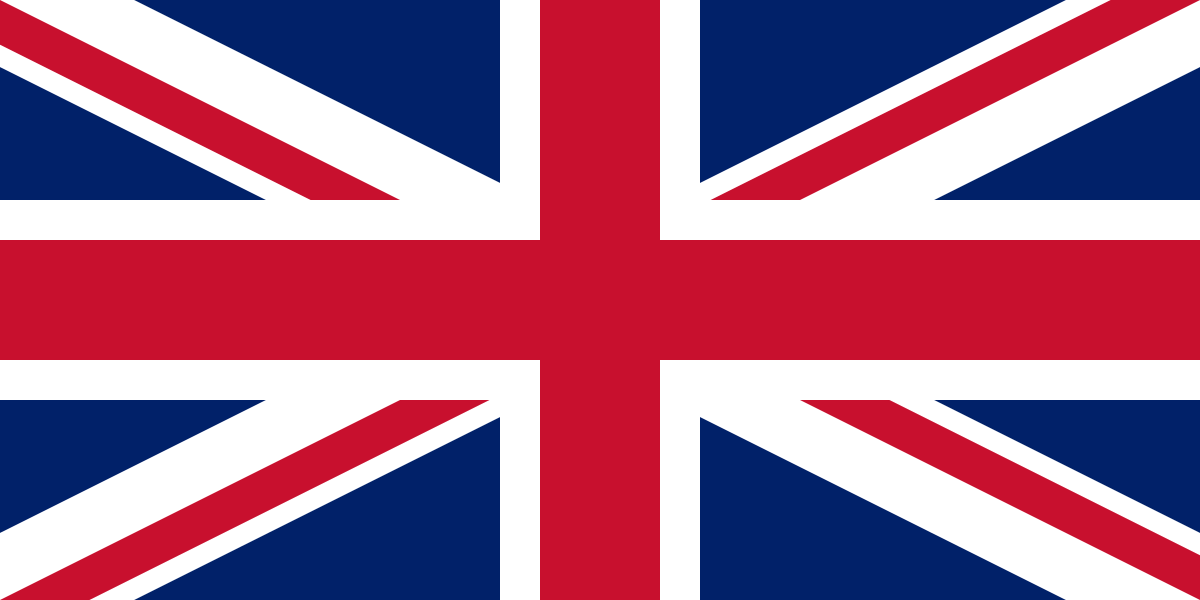

In [352]:
from IPython.display import SVG, display

display(SVG(match.group(1)))